In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_wine
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

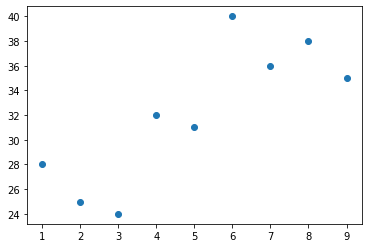

In [2]:
x1=np.arange(1,10)
y1=np.array([28,25,24,32,31,40,36,38,35])
plt.scatter(x1,y1)
plt.show()

In [8]:
x1=x1.reshape(-1,1)
y1=y1.reshape(-1,1)

In [9]:
x1

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [10]:
y1

array([[28],
       [25],
       [24],
       [32],
       [31],
       [40],
       [36],
       [38],
       [35]])

In [11]:
reg1=LinearRegression()

In [12]:
reg1.fit(x1,y1)

LinearRegression()

In [15]:
y_pred=reg1.predict(x1)

In [16]:
y_pred

array([[25.51111111],
       [27.16111111],
       [28.81111111],
       [30.46111111],
       [32.11111111],
       [33.76111111],
       [35.41111111],
       [37.06111111],
       [38.71111111]])

In [18]:
y1

array([[28],
       [25],
       [24],
       [32],
       [31],
       [40],
       [36],
       [38],
       [35]])

In [19]:
mse1=mean_squared_error(y1,y_pred)

In [20]:
mse1

10.170987654320989

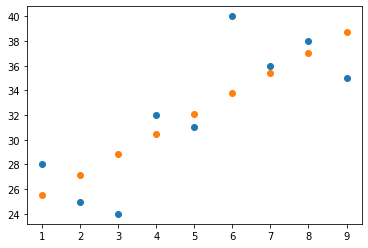

In [21]:
plt.scatter(x1,y1)
plt.scatter(x1,y_pred)
plt.show()

In [22]:
reg3=LinearRegression()

In [23]:
cv1_score=cross_val_score(reg3,x1,y1,cv=4)

In [24]:
print(cv1_score)

[-11.70841444  -6.50948487  -6.52740211  -9.67375283]


In [25]:
print(np.mean(cv1_score))

-8.604763563381962


In [26]:
data1=load_wine()
wineDF = pd.DataFrame(data=data1.data,columns=data1.feature_names)
wineDF['target']=data1.target

In [29]:
x=data1.data 
y=data1.target
x
y
data1.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [31]:
reg2=LogisticRegression()

In [32]:
reg2.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
y_pred2=reg2.predict(x_test)

In [36]:
cm=confusion_matrix(y_test,y_pred2)

In [37]:
print(cm)

[[18  1  0]
 [ 0 21  0]
 [ 0  0 14]]


In [55]:
cm1=normalize(cm,norm='l1',axis=1)

In [56]:
cm1

array([[0.94736842, 0.05263158, 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ]])

In [57]:
cm1Df=pd.DataFrame(cm1,columns=data1.target_names,index=data1.target_names)

In [58]:
print(cm1Df)

          class_0   class_1  class_2
class_0  0.947368  0.052632      0.0
class_1  0.000000  1.000000      0.0
class_2  0.000000  0.000000      1.0
